In [1]:
!pip install psycopg2-binary pandas matplotlib statsmodels pmdarima


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install sqlalchemy



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Параметры подключения
conn = psycopg2.connect(
    host="localhost",
    database="sqlda",
    user="postgres",
    password="1",
    port="5432"
)



In [4]:
from sqlalchemy import create_engine

engine = create_engine('postgresql+psycopg2://postgres:1@localhost:5432/sqlda')

query = """
SELECT
    DATE(sales_transaction_date) AS sales_date,
    SUM(sales_amount) AS daily_revenue
FROM public.sales
GROUP BY sales_date
ORDER BY sales_date;
"""

df = pd.read_sql(query, engine, parse_dates=['sales_date'])
df.set_index('sales_date', inplace=True)
df = df.asfreq('D')
df.fillna(0, inplace=True)
df.head()


,daily_revenue
sales_date,
2010-03-10,359.991
2010-03-11,0.000
2010-03-12,399.990
2010-03-13,0.000
2010-03-14,0.000


In [5]:
import plotly.express as px

# Преобразуем Series в DataFrame
df_plot = df[['daily_revenue']].reset_index()
df_plot.columns = ['Дата', 'Выручка']

fig = px.line(df_plot, x='Дата', y='Выручка', title='Ежедневная выручка')
fig.update_traces(line=dict(color='#1f77b4', width=2))
fig.update_layout(
    hovermode='x unified',
    template='plotly_white',
    xaxis_tickangle=-45,
    height=500,
    width=1000
)
fig.show()

In [6]:
import plotly.graph_objects as go
import pandas as pd

# Агрегируем данные по месяцам
monthly_df = df['daily_revenue'].resample('M').sum()

# Преобразуем Series в DataFrame для удобства работы с Plotly
monthly_df = monthly_df.reset_index()
monthly_df.columns = ['Month', 'Revenue']

# Создаем интерактивный график
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_df['Month'],
    y=monthly_df['Revenue'],
    mode='lines',
    name='Ежемесячная выручка',
    line=dict(color='#1f77b4', width=2)
))

# Настройки оформления
fig.update_layout(
    title='Ежемесячная выручка',
    xaxis_title='Месяц',
    yaxis_title='Выручка',
    title_x=0.5,  # Центрируем заголовок
    title_font=dict(size=14, family='Arial, sans-serif', weight='bold'),
    font=dict(family='Arial, sans-serif', size=12),
    hovermode='x unified',  # Все значения при наведении на одну дату
    template='plotly_white',
    height=600,
    width=1000,
    xaxis_tickangle=-45,
    margin=dict(l=50, r=50, t=80, b=80)
)

# Добавляем пунктирную сетку
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray', griddash='dot')

# Показываем график
fig.show()

C:\Users\direc\AppData\Local\Temp\ipykernel_25800\870373108.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [8]:
stepwise_model = auto_arima(
    monthly_df['Revenue'],  # только числовой временной ряд
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    seasonal=True,
    m=12,  # годовая сезонность
    trace=True
)


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was re

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=3280.115, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3323.966, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3288.062, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3307.059, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3322.505, Time=0.01 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was re

 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3288.182, Time=0.16 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=3279.162, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3303.090, Time=0.06 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=3279.648, Time=0.38 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=3281.582, Time=0.48 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3296.572, Time=0.08 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=3276.542, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=3294.967, Time=0.06 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=3276.810, Time=0.32 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=3277.234, Time=0.17 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=3284.477, Time=0.16 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=3278.776, Time=0.36 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=3278.163, Time=0.06 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(1,0,0)[12] intercept   : AIC=3278.533, Time=0.25 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=3272.431, Time=0.64 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=3297.306, Time=0.15 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=3273.545, Time=0.75 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=3273.726, Time=0.42 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=3289.737, Time=0.13 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=3275.393, Time=1.03 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=3283.673, Time=0.13 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=3264.119, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=3292.406, Time=0.10 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,2)(2,0,0)[12] intercept   : AIC=3263.193, Time=0.72 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=3264.963, Time=1.04 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,2)(1,0,1)[12] intercept   : AIC=3263.599, Time=0.50 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,1)(2,0,0)[12] intercept   : AIC=3278.809, Time=0.35 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,3)(2,0,0)[12] intercept   : AIC=3275.321, Time=0.75 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,3)(2,0,0)[12] intercept   : AIC=3271.859, Time=0.67 sec


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,1,2)(2,0,0)[12]             : AIC=3269.251, Time=0.38 sec

Best model:  ARIMA(3,1,2)(2,0,0)[12] intercept
Total fit time: 11.683 seconds


c:\Users\direc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



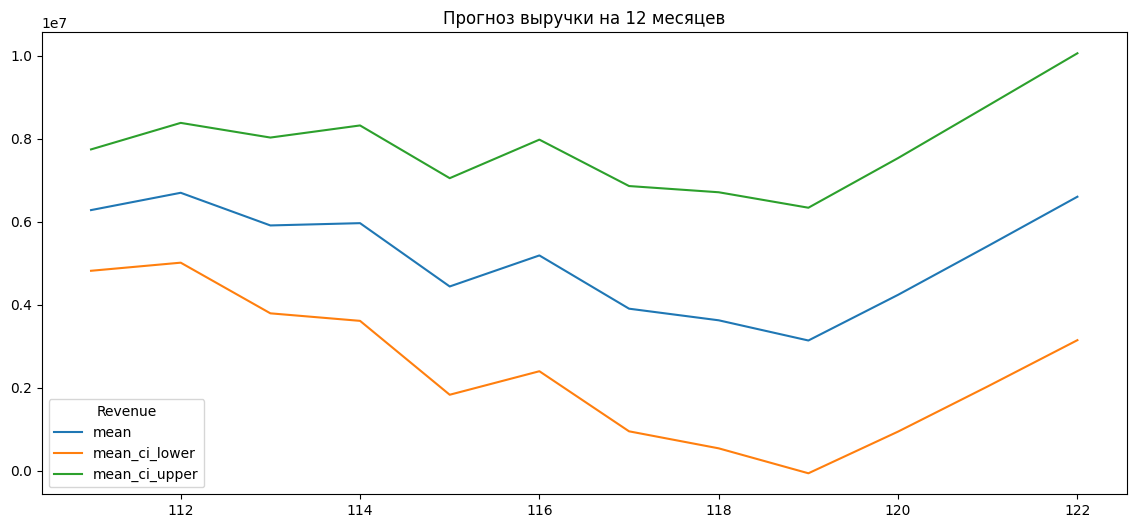

In [10]:
model = SARIMAX(monthly_df['Revenue'],  # Только временной ряд
                order=stepwise_model.order, 
                seasonal_order=stepwise_model.seasonal_order,
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

forecast_df[['mean', 'mean_ci_lower', 'mean_ci_upper']].plot(
    figsize=(14, 6), title='Прогноз выручки на 12 месяцев'
)
plt.show()


In [13]:
# Убедимся, что индекс — datetime
monthly_df['Month'] = pd.to_datetime(monthly_df['Month'])
monthly_df.set_index('Month', inplace=True)

# Последняя дата + месячный шаг
last_date = monthly_df.index[-1]
forecast_df['month'] = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')


C:\Users\direc\AppData\Local\Temp\ipykernel_25800\3016393179.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [15]:
import plotly.graph_objects as go
import pandas as pd

# Добавляем даты прогноза
last_date = monthly_df.index[-1]
forecast_df['month'] = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')

fig = go.Figure()

# Фактическая выручка
fig.add_trace(go.Scatter(
    x=monthly_df.index,
    y=monthly_df['Revenue'],
    mode='lines',
    name='Фактическая выручка',
    line=dict(color='#1f77b4', width=2)
))

# Прогноз
fig.add_trace(go.Scatter(
    x=forecast_df['month'],
    y=forecast_df['mean'],
    mode='lines',
    name='Прогноз выручки',
    line=dict(color='#ff7f0e', dash='dot', width=2)
))

# Доверительный интервал
if 'mean_ci_lower' in forecast_df.columns and 'mean_ci_upper' in forecast_df.columns:
    fig.add_trace(go.Scatter(
        x=forecast_df['month'].tolist() + forecast_df['month'].tolist()[::-1],
        y=forecast_df['mean_ci_upper'].tolist() + forecast_df['mean_ci_lower'].tolist()[::-1],
        fill='toself',
        fillcolor='rgba(255, 127, 14, 0.2)',
        line=dict(color='rgba(255, 127, 14, 0)'),
        name='Доверительный интервал'
    ))

# Вертикальная линия
fig.add_vline(x=last_date, line_dash="dash", line_color="gray")

# Настройки
fig.update_layout(
    title='Фактическая и прогнозируемая выручка по месяцам',
    xaxis_title='Месяц',
    yaxis_title='Суммарная выручка',
    legend_title='Легенда',
    hovermode='x unified',
    template='plotly_white',
    height=500,
    width=1000,
)

fig.show()


C:\Users\direc\AppData\Local\Temp\ipykernel_25800\147037143.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Доверительный интервал — это "вилка", в которой с большой вероятностью окажется реальный результат.

In [16]:
# Выбираем нужные колонки из прогноза
forecast_result = forecast_df[['month', 'mean', 'mean_ci_lower', 'mean_ci_upper']]

# Округляем для удобства
forecast_result = forecast_result.round(2)

# Показываем результат
print(forecast_result)


Revenue      month        mean  mean_ci_lower  mean_ci_upper
111     2019-06-30  6281588.14     4818410.91     7744765.38
112     2019-07-31  6699049.62     5013875.44     8384223.80
113     2019-08-31  5911496.10     3792442.34     8030549.86
114     2019-09-30  5966728.47     3610946.21     8322510.72
115     2019-10-31  4440171.07     1829385.70     7050956.45
116     2019-11-30  5188409.14     2396455.69     7980362.58
117     2019-12-31  3904491.19      947572.68     6861409.71
118     2020-01-31  3624365.32      537165.44     6711565.20
119     2020-02-29  3137398.82      -63983.06     6338780.70
120     2020-03-31  4238603.61      941087.00     7536120.22
121     2020-04-30  5413513.20     2030688.10     8796338.31
122     2020-05-31  6604140.15     3145722.87    10062557.43


Выводы:
Общий тренд:
Прогноз показывает волнообразную, но в целом умеренно растущую выручку в течение года.
Максимум: май 2020 — ~6.6 млн ₽.
Минимум: февраль 2020 — ~3.1 млн ₽ (причём возможны даже отрицательные значения по нижней границе — см. ниже)
Доверительные интервалы:
В летне-осенний период (июнь–сентябрь 2019) прогноз надёжнее: узкие интервалы (разница ~2.5 млн).
Начиная с декабря 2019 по февраль 2020, интервалы шире и менее стабильны — модель менее уверена:
Январь–февраль: нижняя граница близка к нулю или даже отрицательная, что на практике означает высокую неопределённость и возможные провалы.
Март–май 2020 — снова уверенный рост, и уверенность модели увеличивается.
Что важно:
Февраль 2020 — наибольший риск снижения выручки (нижняя граница < 0). Возможно, в обучающих данных был спад в этот период, или данные недостаточно стабильны.
Апрель–май 2020 — вероятен пик продаж, но с повышенной неопределённостью (интервал более 7 млн ₽ шириной).
Сезонность, возможно, годовая — характерно для бизнеса, зависящего от кварталов или праздников.